This is still a work in progress, and is a VERY basic spark ML model. Will change and fine-tune this to fit my needs better, but I wanted to get something working for the most part. 

In [2]:
!pip install pyspark

  Using cached https://files.pythonhosted.org/packages/e3/53/c737818eb9a7dc32a7cd4f1396e787bd94200c3997c72c1dbe028587bd76/py4j-0.10.7-py2.py3-none-any.whl
  Stored in directory: C:\Users\Prem Rana\AppData\Local\pip\Cache\wheels\ab\09\4d\0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark


In [1]:
if 'sc' not in locals():
    from pyspark.context import SparkContext
    from pyspark.sql.context import SQLContext
    from pyspark.sql.session import SparkSession
    
    sc = SparkContext()
    sqlContext = SQLContext(sc)
    spark = SparkSession(sc)

In [2]:
def run_sql(statement):
    try:
        result = sqlContext.sql(statement)
    except Exception as e:
        print(e.desc, '\n', e.stackTrace)
        return
    return result

In [3]:
import pandas as pd

In [32]:
df = pd.read_csv("stats.csv")

In [33]:
stats = df.set_index("Team Name")
stats

,hanamura_Wins,hanamura_Losses,hanamura_Draws,hanamura_Times Played,hanamura_Average Points Earned,hanamura_Average Points Lost,hanamura_Average Points Differential,hanamura_Win %,hanamura_Win % Rank,hanamura_True %,...,Average Escort Points Earned,Average Escort Points Lost,Average Escort Points Differential,Average Escort Points Differential Rank,Average Escort Win %,Average Escort Win % Rank,Average Escort True Win %,Average Escort True Win % Rank,Average Escort Map Potential %,Average Escort Map Potential % Rank
Team Name,,,,,,,,,,,,,,,,,,,,,
Atlanta Reign,2.0,2.0,1.0,5.0,3.000,2.800,0.200,40.000,9.0,50.000,...,2.519500,2.502667,0.016833,9.0,55.172414,7.0,55.172414,7.0,0.811000,3.0
Boston Uprising,1.0,4.0,0.0,5.0,1.600,2.200,-0.600,20.000,18.0,20.000,...,1.894500,2.222167,-0.327667,14.0,35.714286,16.0,35.714286,16.0,0.623500,20.0
Chengdu Hunters,2.0,3.0,0.0,5.0,1.800,2.000,-0.200,40.000,9.0,40.000,...,1.938833,2.250000,-0.311167,13.0,35.714286,16.0,35.714286,16.0,0.666833,14.0
Dallas Fuel,0.0,5.0,0.0,5.0,1.200,2.400,-1.200,0.000,19.0,0.000,...,2.241667,2.791667,-0.550000,19.0,32.142857,18.0,32.142857,18.0,0.652167,16.0
Florida Mayhem,5.0,1.0,0.0,6.0,3.167,2.333,0.834,83.333,2.0,83.333,...,1.863833,2.325000,-0.461167,17.0,39.285714,13.0,39.285714,13.0,0.633333,19.0
Guangzhou Charge,2.0,3.0,0.0,5.0,2.600,2.600,0.000,40.000,9.0,40.000,...,2.005500,2.338833,-0.333333,15.0,39.285714,13.0,39.285714,13.0,0.671000,13.0
Hangzhou Spark,4.0,2.0,0.0,6.0,1.833,1.500,0.333,66.667,5.0,66.667,...,2.219333,2.072333,0.147000,6.0,58.064516,5.0,58.064516,5.0,0.774833,6.0
Houston Outlaws,2.0,3.0,0.0,5.0,1.400,2.000,-0.600,40.000,9.0,40.000,...,1.841667,2.211167,-0.369500,16.0,39.285714,13.0,39.285714,13.0,0.684167,11.0
London Spitfire,3.0,3.0,1.0,7.0,1.714,1.714,0.000,42.857,8.0,50.000,...,1.972167,2.177833,-0.205667,11.0,48.275862,9.0,48.275862,9.0,0.665667,15.0


In [6]:
sparkstats = spark.read.csv("stats.csv", header=True, inferSchema = True)

In [7]:
sparkstats.printSchema()

root
 |-- Team Name: string (nullable = true)
 |-- hanamura_Wins: double (nullable = true)
 |-- hanamura_Losses: double (nullable = true)
 |-- hanamura_Draws: double (nullable = true)
 |-- hanamura_Times Played: double (nullable = true)
 |-- hanamura_Average Points Earned: double (nullable = true)
 |-- hanamura_Average Points Lost: double (nullable = true)
 |-- hanamura_Average Points Differential: double (nullable = true)
 |-- hanamura_Win %: double (nullable = true)
 |-- hanamura_Win % Rank: double (nullable = true)
 |-- hanamura_True %: double (nullable = true)
 |-- hanamura_True % Rank: double (nullable = true)
 |-- hanamura_Map Potential %: double (nullable = true)
 |-- hanamura_Map Potential % Rank: double (nullable = true)
 |-- horizon-lunar-colony_Wins: double (nullable = true)
 |-- horizon-lunar-colony_Losses: double (nullable = true)
 |-- horizon-lunar-colony_Draws: double (nullable = true)
 |-- horizon-lunar-colony_Times Played: double (nullable = true)
 |-- horizon-lunar-co

In [8]:
sparkstats.registerTempTable("stats")
tbls = run_sql('show tables')
tbls.toPandas()

,database,tableName,isTemporary
0,,stats,True


In [9]:
stats = run_sql("SELECT * from stats")
stats.toPandas()

,Team Name,hanamura_Wins,hanamura_Losses,hanamura_Draws,hanamura_Times Played,hanamura_Average Points Earned,hanamura_Average Points Lost,hanamura_Average Points Differential,hanamura_Win %,hanamura_Win % Rank,...,Average Escort Points Earned,Average Escort Points Lost,Average Escort Points Differential,Average Escort Points Differential Rank,Average Escort Win %,Average Escort Win % Rank,Average Escort True Win %,Average Escort True Win % Rank,Average Escort Map Potential %,Average Escort Map Potential % Rank
0,Atlanta Reign,2.0,2.0,1.0,5.0,3.000,2.800,0.200,40.000,9.0,...,2.519500,2.502667,0.016833,9.0,55.172414,7.0,55.172414,7.0,0.811000,3.0
1,Boston Uprising,1.0,4.0,0.0,5.0,1.600,2.200,-0.600,20.000,18.0,...,1.894500,2.222167,-0.327667,14.0,35.714286,16.0,35.714286,16.0,0.623500,20.0
2,Chengdu Hunters,2.0,3.0,0.0,5.0,1.800,2.000,-0.200,40.000,9.0,...,1.938833,2.250000,-0.311167,13.0,35.714286,16.0,35.714286,16.0,0.666833,14.0
3,Dallas Fuel,0.0,5.0,0.0,5.0,1.200,2.400,-1.200,0.000,19.0,...,2.241667,2.791667,-0.550000,19.0,32.142857,18.0,32.142857,18.0,0.652167,16.0
4,Florida Mayhem,5.0,1.0,0.0,6.0,3.167,2.333,0.834,83.333,2.0,...,1.863833,2.325000,-0.461167,17.0,39.285714,13.0,39.285714,13.0,0.633333,19.0
5,Guangzhou Charge,2.0,3.0,0.0,5.0,2.600,2.600,0.000,40.000,9.0,...,2.005500,2.338833,-0.333333,15.0,39.285714,13.0,39.285714,13.0,0.671000,13.0
6,Hangzhou Spark,4.0,2.0,0.0,6.0,1.833,1.500,0.333,66.667,5.0,...,2.219333,2.072333,0.147000,6.0,58.064516,5.0,58.064516,5.0,0.774833,6.0
7,Houston Outlaws,2.0,3.0,0.0,5.0,1.400,2.000,-0.600,40.000,9.0,...,1.841667,2.211167,-0.369500,16.0,39.285714,13.0,39.285714,13.0,0.684167,11.0
8,London Spitfire,3.0,3.0,1.0,7.0,1.714,1.714,0.000,42.857,8.0,...,1.972167,2.177833,-0.205667,11.0,48.275862,9.0,48.275862,9.0,0.665667,15.0
9,Los Angeles Gladiators,0.0,4.0,1.0,5.0,1.000,1.800,-0.800,0.000,19.0,...,2.100000,2.008333,0.091667,7.0,46.428571,11.0,46.428571,11.0,0.713833,8.0


In [10]:
total = run_sql(
    """
    SELECT
        `Team Name`,
        SUM(`Total Assault Wins` + `Total Escort Wins` + `Total Control Wins` + `Total Hybrid Wins`) as maps_wins,
        SUM(`Total Assault Losses` + `Total Escort Losses` + `Total Control Losses` + `Total Hybrid Losses`) as maps_loss,
        SUM(`Total Assault Draws` + `Total Escort Draws` + `Total Control Draws` + `Total Hybrid Draws`) as maps_draws,
        SUM(`Total Assault Played` + `Total Escort Played` + `Total Control Played` + `Total Hybrid Played`) as maps_played,
        ROUND(SUM(`Average Assault Points Earned` + `Average Control Points Earned` + `Average Escort Points Earned` + `Average Hybrid Points Earned`)/4 ,2) as points_earned,
        ROUND(SUM(`Average Assault Points Lost` + `Average Control Points Lost` + `Average Escort Points Lost` + `Average Hybrid Points Lost`)/4 ,2) as points_lost,
        ROUND(SUM(`Average Assault Points Differential` + `Average Control Points Differential` + `Average Escort Points Differential` + `Average Hybrid Points Differential`)/4 ,2) as points_diff,
        ROUND(SUM(`Average Assault True Win %` + `Average Control True Win %` + `Average Escort True Win %` + `Average Hybrid True Win %`)/4 ,2) as win_per,
        ROUND(SUM(`Average Assault Map Potential %` + `Average Control Map Potential %` + `Average Escort Map Potential %` + `Average Hybrid Map Potential %`)/4 ,2) as map_potential
    FROM
        stats
    GROUP BY `Team Name`
    ORDER BY `Team Name`
    """

)
total.toPandas()

,Team Name,maps_wins,maps_loss,maps_draws,maps_played,points_earned,points_lost,points_diff,win_per,map_potential
0,Atlanta Reign,70.0,53.0,1.0,124.0,2.14,1.95,0.19,56.68,0.75
1,Boston Uprising,41.0,81.0,2.0,124.0,1.82,2.22,-0.40,34.27,0.61
2,Chengdu Hunters,55.0,66.0,1.0,122.0,1.99,2.02,-0.02,44.62,0.72
3,Dallas Fuel,43.0,73.0,3.0,119.0,1.93,2.32,-0.39,36.86,0.64
4,Florida Mayhem,36.0,75.0,5.0,116.0,1.77,2.27,-0.50,33.59,0.62
5,Guangzhou Charge,61.0,57.0,1.0,119.0,2.00,1.99,0.01,51.16,0.70
6,Hangzhou Spark,69.0,60.0,4.0,133.0,1.97,1.88,0.09,53.45,0.72
7,Houston Outlaws,47.0,72.0,3.0,122.0,1.61,1.98,-0.37,39.30,0.59
8,London Spitfire,59.0,55.0,6.0,120.0,1.97,1.94,0.03,51.88,0.72
9,Los Angeles Gladiators,67.0,51.0,3.0,121.0,1.99,1.77,0.23,56.79,0.75


In [11]:
sqlContext.registerDataFrameAsTable(total, "total")
tbls = run_sql('show tables')
tbls.toPandas()

,database,tableName,isTemporary
0,,stats,True
1,,total,True


In [34]:
assault = run_sql(
    """
    SELECT
        `Team Name`,
        `Total Assault Wins`,
        `Total Assault Losses`,
        `Total Assault Draws`,
        `Total Assault Played`,
        `Average Assault Points Earned`, 
        `Average Assault Points Lost`, 
        `Average Assault Points Differential`, 
        `Average Assault True Win %`, 
        `Average Assault Map Potential %`
    FROM
        stats
    
    """

)
sqlContext.registerDataFrameAsTable(assault, "assault")
assault.toPandas()

,Team Name,Total Assault Wins,Total Assault Losses,Total Assault Draws,Total Assault Played,Average Assault Points Earned,Average Assault Points Lost,Average Assault Points Differential,Average Assault True Win %,Average Assault Map Potential %
0,Atlanta Reign,15.0,13.0,1.0,29.0,2.4150,2.2308,0.1842,53.448276,0.7418
1,Boston Uprising,9.0,18.0,2.0,29.0,2.3466,2.6266,-0.2800,34.482759,0.7144
2,Chengdu Hunters,11.0,16.0,1.0,28.0,2.2284,2.3184,-0.0900,41.071429,0.7844
3,Dallas Fuel,7.0,19.0,3.0,29.0,2.2092,2.7736,-0.5644,29.310345,0.6474
4,Florida Mayhem,10.0,15.0,3.0,28.0,2.4058,2.6104,-0.2046,41.071429,0.7464
5,Guangzhou Charge,15.0,13.0,0.0,28.0,2.1892,2.0796,0.1096,53.571429,0.7232
6,Hangzhou Spark,15.0,13.0,3.0,31.0,2.0794,2.0292,0.0502,53.225806,0.7828
7,Houston Outlaws,9.0,17.0,3.0,29.0,1.7492,2.0878,-0.3386,36.206897,0.5490
8,London Spitfire,16.0,10.0,3.0,29.0,2.3086,1.9670,0.3416,60.344828,0.8154
9,Los Angeles Gladiators,16.0,11.0,2.0,29.0,2.1610,1.8578,0.3032,58.620690,0.8038


In [35]:
control = run_sql(
    """
    SELECT
        `Team Name`,
        `Total Control Wins`,
        `Total Control Losses`,
        `Total Control Draws`,
        `Total Control Played`,
        `Average Control Points Earned`, 
        `Average Control Points Lost`, 
        `Average Control Points Differential`, 
        `Average Control True Win %`, 
        `Average Control Map Potential %`
    FROM
        stats
    
    """

)
sqlContext.registerDataFrameAsTable(control, "control")
control.toPandas()

,Team Name,Total Control Wins,Total Control Losses,Total Control Draws,Total Control Played,Average Control Points Earned,Average Control Points Lost,Average Control Points Differential,Average Control True Win %,Average Control Map Potential %
0,Atlanta Reign,22.0,15.0,0.0,37.0,1.2716,1.0898,0.1818,59.459459,0.6356
1,Boston Uprising,11.0,27.0,0.0,38.0,0.8180,1.5638,-0.7458,28.947368,0.4092
2,Chengdu Hunters,21.0,17.0,0.0,38.0,1.2946,1.1728,0.1218,55.263158,0.6472
3,Dallas Fuel,17.0,16.0,0.0,33.0,1.1280,1.1584,-0.0304,51.515152,0.5642
4,Florida Mayhem,7.0,25.0,0.0,32.0,0.7534,1.5706,-0.8172,21.875000,0.3766
5,Guangzhou Charge,21.0,14.0,0.0,35.0,1.3446,1.0554,0.2892,60.000000,0.6722
6,Hangzhou Spark,21.0,19.0,0.0,40.0,1.2402,1.1872,0.0530,52.500000,0.6202
7,Houston Outlaws,17.0,19.0,0.0,36.0,1.1562,1.2646,-0.1084,47.222222,0.5784
8,London Spitfire,15.0,18.0,0.0,33.0,1.3200,1.1266,0.1934,45.454545,0.6600
9,Los Angeles Gladiators,18.0,17.0,0.0,35.0,1.2224,1.0848,0.1376,51.428571,0.6110


In [36]:
hybrid = run_sql(
    """
    SELECT
        `Team Name`,
        `Total Hybrid Wins`,
        `Total Hybrid Losses`,
        `Total Hybrid Draws`,
        `Total Hybrid Played`,
        `Average Hybrid Points Earned`, 
        `Average Hybrid Points Lost`, 
        `Average Hybrid Points Differential`, 
        `Average Hybrid True Win %`, 
        `Average Hybrid Map Potential %`
    FROM
        stats
    
    """

)
sqlContext.registerDataFrameAsTable(hybrid, "hybrid")
hybrid.toPandas()

,Team Name,Total Hybrid Wins,Total Hybrid Losses,Total Hybrid Draws,Total Hybrid Played,Average Hybrid Points Earned,Average Hybrid Points Lost,Average Hybrid Points Differential,Average Hybrid True Win %,Average Hybrid Map Potential %
0,Atlanta Reign,17.0,12.0,0.0,29.0,2.3590,1.9956,0.3634,58.620690,0.7978
1,Boston Uprising,11.0,18.0,0.0,29.0,2.2316,2.4650,-0.2334,37.931034,0.6908
2,Chengdu Hunters,13.0,15.0,0.0,28.0,2.5166,2.3234,0.1932,46.428571,0.7848
3,Dallas Fuel,10.0,19.0,0.0,29.0,2.1428,2.5728,-0.4300,34.482759,0.6958
4,Florida Mayhem,8.0,18.0,2.0,28.0,2.0524,2.5780,-0.5256,32.142857,0.7178
5,Guangzhou Charge,14.0,13.0,1.0,28.0,2.4728,2.5044,-0.0316,51.785714,0.7476
6,Hangzhou Spark,15.0,15.0,1.0,31.0,2.3300,2.2250,0.1050,50.000000,0.7106
7,Houston Outlaws,10.0,19.0,0.0,29.0,1.6952,2.3442,-0.6490,34.482759,0.5592
8,London Spitfire,14.0,12.0,3.0,29.0,2.2806,2.5066,-0.2260,53.448276,0.7216
9,Los Angeles Gladiators,20.0,8.0,1.0,29.0,2.4844,2.1156,0.3688,70.689655,0.8632


In [37]:
escort = run_sql(
    """
    SELECT
        `Team Name`,
        `Total Escort Wins`,
        `Total Escort Losses`,
        `Total Escort Draws`,
        `Total Escort Played`,
        `Average Escort Points Earned`, 
        `Average Escort Points Lost`, 
        `Average Escort Points Differential`, 
        `Average Escort True Win %`, 
        `Average Escort Map Potential %`
    FROM
        stats
    
    """

)
sqlContext.registerDataFrameAsTable(escort, "escort")
escort.toPandas()

,Team Name,Total Escort Wins,Total Escort Losses,Total Escort Draws,Total Escort Played,Average Escort Points Earned,Average Escort Points Lost,Average Escort Points Differential,Average Escort True Win %,Average Escort Map Potential %
0,Atlanta Reign,16.0,13.0,0.0,29.0,2.519500,2.502667,0.016833,55.172414,0.811000
1,Boston Uprising,10.0,18.0,0.0,28.0,1.894500,2.222167,-0.327667,35.714286,0.623500
2,Chengdu Hunters,10.0,18.0,0.0,28.0,1.938833,2.250000,-0.311167,35.714286,0.666833
3,Dallas Fuel,9.0,19.0,0.0,28.0,2.241667,2.791667,-0.550000,32.142857,0.652167
4,Florida Mayhem,11.0,17.0,0.0,28.0,1.863833,2.325000,-0.461167,39.285714,0.633333
5,Guangzhou Charge,11.0,17.0,0.0,28.0,2.005500,2.338833,-0.333333,39.285714,0.671000
6,Hangzhou Spark,18.0,13.0,0.0,31.0,2.219333,2.072333,0.147000,58.064516,0.774833
7,Houston Outlaws,11.0,17.0,0.0,28.0,1.841667,2.211167,-0.369500,39.285714,0.684167
8,London Spitfire,14.0,15.0,0.0,29.0,1.972167,2.177833,-0.205667,48.275862,0.665667
9,Los Angeles Gladiators,13.0,15.0,0.0,28.0,2.100000,2.008333,0.091667,46.428571,0.713833


In [38]:
tbls = run_sql('show tables')
tbls.toPandas()

,database,tableName,isTemporary
0,,assault,True
1,,control,True
2,,data,True
3,,escort,True
4,,filtered,True
5,,hybrid,True
6,,stats,True
7,,total,True


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


Text(0, 0.5, 'Percentage')

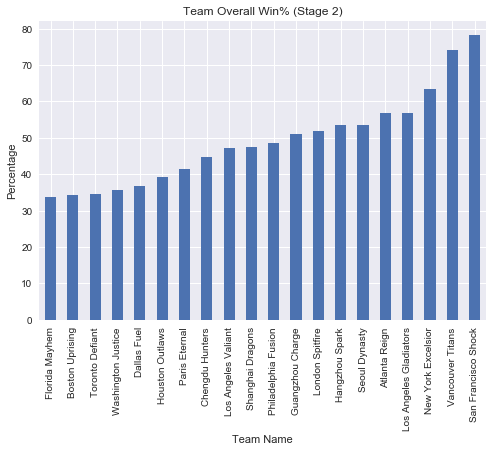

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')


total.toPandas().sort_values("win_per").plot(kind='bar', x="Team Name", y="win_per", label = '_nolegend_')
plt.title("Team Overall Win% (Stage 2)")
plt.ylabel("Percentage")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


Text(0, 0.5, 'Percentage')

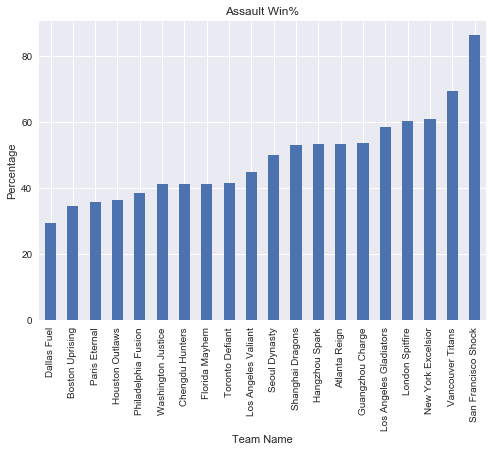

In [40]:
assault.toPandas().sort_values("Average Assault True Win %").plot(kind='bar', x="Team Name", y="Average Assault True Win %", label = '_nolegend_')
plt.title("Assault Win%")
plt.ylabel("Percentage")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


Text(0, 0.5, 'Percentage')

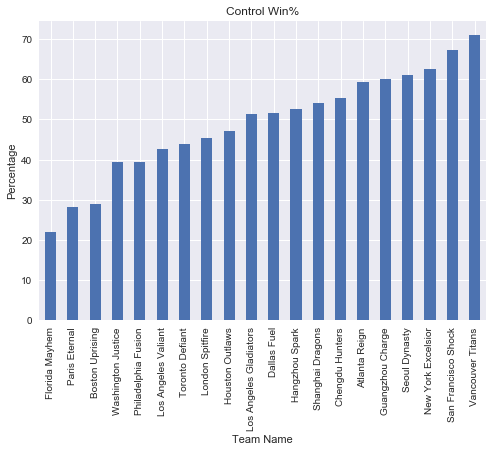

In [41]:
control.toPandas().sort_values("Average Control True Win %").plot(kind='bar', x="Team Name", y="Average Control True Win %", label = "_nolegend_")
plt.title("Control Win%")
plt.ylabel("Percentage")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


Text(0, 0.5, 'Percentage')

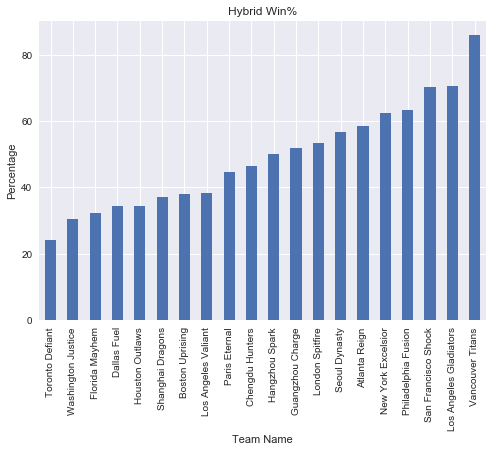

In [42]:
hybrid.toPandas().sort_values("Average Hybrid True Win %").plot(kind='bar', x="Team Name", y="Average Hybrid True Win %", label = "_nolegend_")
plt.title("Hybrid Win%")
plt.ylabel("Percentage")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


Text(0, 0.5, 'Percentage')

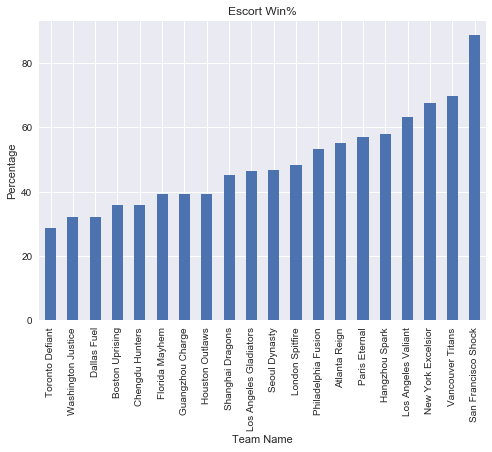

In [43]:
escort.toPandas().sort_values("Average Escort True Win %").plot(kind='bar', x="Team Name", y="Average Escort True Win %", label = "_nolegend_")
plt.title("Escort Win%")
plt.ylabel("Percentage")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


Text(0, 0.5, 'Points')

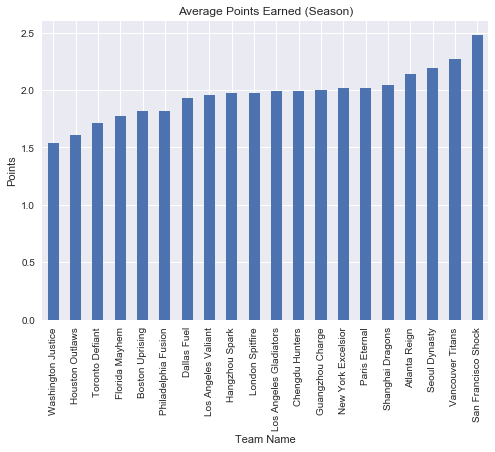

In [44]:
total.toPandas().sort_values("points_earned").plot(kind='bar', x="Team Name", y="points_earned", label = "_nolegend_")
plt.title("Average Points Earned (Season)")
plt.ylabel("Points")

Text(0.5, 1.0, 'Average Points Lost vs  Average Points Earned (Stage 2)')

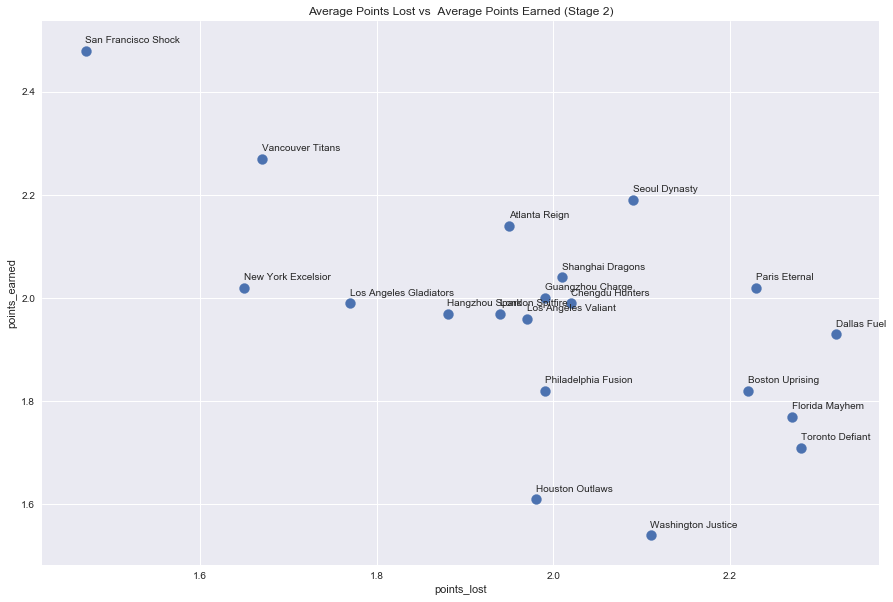

In [45]:
total.toPandas().plot(kind= 'scatter', x= 'points_lost', y= 'points_earned', figsize= (15, 10), s=100)
for i, name in enumerate(total.toPandas()["Team Name"]):
    plt.annotate(name, (total.toPandas()["points_lost"][i]-0.0001, total.toPandas()["points_earned"][i]+0.015))

plt.title("Average Points Lost vs  Average Points Earned (Stage 2)")

In [46]:
import pyspark
pyspark.__version__

'2.4.4'

In [47]:
data = spark.read.csv("data2019.csv", header=True, inferSchema = True)

In [48]:
data.printSchema()
data.registerTempTable("data")

root
 |-- date: timestamp (nullable = true)
 |-- stage: string (nullable = true)
 |-- away: string (nullable = true)
 |-- away id: integer (nullable = true)
 |-- away score: integer (nullable = true)
 |-- home: string (nullable = true)
 |-- home id: integer (nullable = true)
 |-- home score: integer (nullable = true)
 |-- winner: string (nullable = true)
 |-- winner id: integer (nullable = true)
 |-- home point differential: integer (nullable = true)
 |-- away point differential: integer (nullable = true)
 |-- winner label: string (nullable = true)
 |-- Map 1 Name: string (nullable = true)
 |-- Map 1 Type: string (nullable = true)
 |-- Map 1 Away Points: integer (nullable = true)
 |-- Map 1 Home Points: integer (nullable = true)
 |-- Map 1 Winner: string (nullable = true)
 |-- Map 1 Away Player 1: string (nullable = true)
 |-- Map 1 Away Player 2: string (nullable = true)
 |-- Map 1 Away Player 3: string (nullable = true)
 |-- Map 1 Away Player 4: string (nullable = true)
 |-- Map 1 Aw

In [49]:
filtered = run_sql(
    """
    SELECT
        stage, away, `away id`, home, `home id`, winner, `winner label`
    FROM
        data    
    
    """
)

filtered.toPandas()

,stage,away,away id,home,home id,winner,winner label
0,Overwatch League Stage 1,Philadelphia Fusion,4524,London Spitfire,4410,Philadelphia Fusion,Away
1,Overwatch League Stage 1,New York Excelsior,4403,Boston Uprising,4402,New York Excelsior,Away
2,Overwatch League Stage 1,Seoul Dynasty,4409,Los Angeles Gladiators,4406,Seoul Dynasty,Away
3,Overwatch League Stage 1,Shanghai Dragons,4408,Hangzhou Spark,7693,Hangzhou Spark,Home
4,Overwatch League Stage 1,Toronto Defiant,7695,Houston Outlaws,4525,Toronto Defiant,Away
5,Overwatch League Stage 1,Atlanta Reign,7698,Florida Mayhem,4407,Atlanta Reign,Away
6,Overwatch League Stage 1,Dallas Fuel,4523,San Francisco Shock,4404,San Francisco Shock,Home
7,Overwatch League Stage 1,Chengdu Hunters,7692,Guangzhou Charge,7699,Chengdu Hunters,Away
8,Overwatch League Stage 1,London Spitfire,4410,Paris Eternal,7694,Paris Eternal,Home
9,Overwatch League Stage 1,Washington Justice,7697,New York Excelsior,4403,New York Excelsior,Home


In [50]:
filtered.registerTempTable("filtered")
tbls = run_sql('show tables')
tbls.toPandas()

,database,tableName,isTemporary
0,,assault,True
1,,control,True
2,,data,True
3,,escort,True
4,,filtered,True
5,,hybrid,True
6,,stats,True
7,,total,True


In [51]:
data = run_sql(
    """
    SELECT * FROM filtered
    WHERE stage NOT LIKE '%Post-Season%'
    
    """
)
data.toPandas()



,stage,away,away id,home,home id,winner,winner label
0,Overwatch League Stage 1,Philadelphia Fusion,4524,London Spitfire,4410,Philadelphia Fusion,Away
1,Overwatch League Stage 1,New York Excelsior,4403,Boston Uprising,4402,New York Excelsior,Away
2,Overwatch League Stage 1,Seoul Dynasty,4409,Los Angeles Gladiators,4406,Seoul Dynasty,Away
3,Overwatch League Stage 1,Shanghai Dragons,4408,Hangzhou Spark,7693,Hangzhou Spark,Home
4,Overwatch League Stage 1,Toronto Defiant,7695,Houston Outlaws,4525,Toronto Defiant,Away
5,Overwatch League Stage 1,Atlanta Reign,7698,Florida Mayhem,4407,Atlanta Reign,Away
6,Overwatch League Stage 1,Dallas Fuel,4523,San Francisco Shock,4404,San Francisco Shock,Home
7,Overwatch League Stage 1,Chengdu Hunters,7692,Guangzhou Charge,7699,Chengdu Hunters,Away
8,Overwatch League Stage 1,London Spitfire,4410,Paris Eternal,7694,Paris Eternal,Home
9,Overwatch League Stage 1,Washington Justice,7697,New York Excelsior,4403,New York Excelsior,Home


In [52]:
pdas = assault.toPandas()
pdcon = control.toPandas()
pdhy = hybrid.toPandas()
pdes = escort.toPandas()
pdto = total.toPandas()
data = data.toPandas()

In [54]:
stats = pd.concat([pdas, pdcon, pdhy, pdes, pdto], axis = 1)
stats = stats.loc[:, ~stats.columns.duplicated()]
stats = stats.set_index("Team Name")
stats

,Total Assault Wins,Total Assault Losses,Total Assault Draws,Total Assault Played,Average Assault Points Earned,Average Assault Points Lost,Average Assault Points Differential,Average Assault True Win %,Average Assault Map Potential %,Total Control Wins,...,Average Escort Map Potential %,maps_wins,maps_loss,maps_draws,maps_played,points_earned,points_lost,points_diff,win_per,map_potential
Team Name,,,,,,,,,,,,,,,,,,,,,
Atlanta Reign,15.0,13.0,1.0,29.0,2.4150,2.2308,0.1842,53.448276,0.7418,22.0,...,0.811000,70.0,53.0,1.0,124.0,2.14,1.95,0.19,56.68,0.75
Boston Uprising,9.0,18.0,2.0,29.0,2.3466,2.6266,-0.2800,34.482759,0.7144,11.0,...,0.623500,41.0,81.0,2.0,124.0,1.82,2.22,-0.40,34.27,0.61
Chengdu Hunters,11.0,16.0,1.0,28.0,2.2284,2.3184,-0.0900,41.071429,0.7844,21.0,...,0.666833,55.0,66.0,1.0,122.0,1.99,2.02,-0.02,44.62,0.72
Dallas Fuel,7.0,19.0,3.0,29.0,2.2092,2.7736,-0.5644,29.310345,0.6474,17.0,...,0.652167,43.0,73.0,3.0,119.0,1.93,2.32,-0.39,36.86,0.64
Florida Mayhem,10.0,15.0,3.0,28.0,2.4058,2.6104,-0.2046,41.071429,0.7464,7.0,...,0.633333,36.0,75.0,5.0,116.0,1.77,2.27,-0.50,33.59,0.62
Guangzhou Charge,15.0,13.0,0.0,28.0,2.1892,2.0796,0.1096,53.571429,0.7232,21.0,...,0.671000,61.0,57.0,1.0,119.0,2.00,1.99,0.01,51.16,0.70
Hangzhou Spark,15.0,13.0,3.0,31.0,2.0794,2.0292,0.0502,53.225806,0.7828,21.0,...,0.774833,69.0,60.0,4.0,133.0,1.97,1.88,0.09,53.45,0.72
Houston Outlaws,9.0,17.0,3.0,29.0,1.7492,2.0878,-0.3386,36.206897,0.5490,17.0,...,0.684167,47.0,72.0,3.0,122.0,1.61,1.98,-0.37,39.30,0.59
London Spitfire,16.0,10.0,3.0,29.0,2.3086,1.9670,0.3416,60.344828,0.8154,15.0,...,0.665667,59.0,55.0,6.0,120.0,1.97,1.94,0.03,51.88,0.72


In [100]:
def get_team_stats(team):
    teamrow = stats.loc[team, :]
    return teamrow

def home_team_winner(row):
    if row['home'] == row['winner']:
        return 1 
    else:
        return 0

finaldf = []
for index, row in data.iterrows():
    awayrow = get_team_stats(row["away"])
    homerow = get_team_stats(row["home"])
    awayrow = awayrow.rename(lambda x: "Away " + x)
    homerow = homerow.rename(lambda x: "Home " + x)
    test = pd.concat([row, awayrow, homerow], )
    finaldf.append(test)
    
finaldf = pd.DataFrame(finaldf)
finaldf.insert(finaldf.columns.get_loc("winner"), 'HomeTeamWin', finaldf.apply(home_team_winner, axis = 1))
finaldf = finaldf.drop(["stage", "home", "away", "winner", "winner label"], axis = 1)
finaldf

,away id,home id,HomeTeamWin,Away Total Assault Wins,Away Total Assault Losses,Away Total Assault Draws,Away Total Assault Played,Away Average Assault Points Earned,Away Average Assault Points Lost,Away Average Assault Points Differential,...,Home Average Escort Map Potential %,Home maps_wins,Home maps_loss,Home maps_draws,Home maps_played,Home points_earned,Home points_lost,Home points_diff,Home win_per,Home map_potential
0,4524,4410,0,10.0,17.0,3.0,30.0,2.3084,2.6000,-0.2916,...,0.665667,59.0,55.0,6.0,120.0,1.97,1.94,0.03,51.88,0.72
1,4403,4402,0,18.0,11.0,3.0,32.0,2.0868,1.8150,0.2718,...,0.623500,41.0,81.0,2.0,124.0,1.82,2.22,-0.40,34.27,0.61
2,4409,4406,0,14.0,14.0,3.0,31.0,2.3434,2.1816,0.1618,...,0.713833,67.0,51.0,3.0,121.0,1.99,1.77,0.23,56.79,0.75
3,4408,7693,1,16.0,14.0,2.0,32.0,2.6038,2.6180,-0.0142,...,0.774833,69.0,60.0,4.0,133.0,1.97,1.88,0.09,53.45,0.72
4,7695,4525,0,11.0,16.0,2.0,29.0,1.9016,2.2484,-0.3468,...,0.684167,47.0,72.0,3.0,122.0,1.61,1.98,-0.37,39.30,0.59
5,7698,4407,0,15.0,13.0,1.0,29.0,2.4150,2.2308,0.1842,...,0.633333,36.0,75.0,5.0,116.0,1.77,2.27,-0.50,33.59,0.62
6,4523,4404,1,7.0,19.0,3.0,29.0,2.2092,2.7736,-0.5644,...,0.923667,121.0,35.0,0.0,156.0,2.48,1.47,1.01,78.26,0.89
7,7692,7699,0,11.0,16.0,1.0,28.0,2.2284,2.3184,-0.0900,...,0.671000,61.0,57.0,1.0,119.0,2.00,1.99,0.01,51.16,0.70
8,4410,7694,1,16.0,10.0,3.0,29.0,2.3086,1.9670,0.3416,...,0.804833,46.0,67.0,3.0,116.0,2.02,2.23,-0.21,41.41,0.68
9,7697,4403,1,9.0,14.0,5.0,28.0,1.5908,1.9764,-0.3856,...,0.808167,84.0,48.0,3.0,135.0,2.02,1.65,0.38,63.42,0.79


In [101]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler

cols = finaldf.loc[:, ~finaldf.columns.isin(['HomeTeamWin'])].columns
cols = cols.tolist()

In [102]:
vec_assembler = VectorAssembler(inputCols = cols, outputCol = 'features')
stages = [vec_assembler]

In [103]:
finaldf = spark.createDataFrame(finaldf)

In [104]:
label_stringIdx = StringIndexer(inputCol="HomeTeamWin", outputCol="label")
stages += [label_stringIdx]

In [105]:
pipeline = Pipeline(stages=stages)

pipelineModel = pipeline.fit(finaldf)
dataset = pipelineModel.transform(finaldf)

In [106]:
selectedcols = ["label", "features"] + cols
dataset = dataset.select(selectedcols)
dataset.limit(10).toPandas()

,label,features,away id,home id,Away Total Assault Wins,Away Total Assault Losses,Away Total Assault Draws,Away Total Assault Played,Away Average Assault Points Earned,Away Average Assault Points Lost,...,Home Average Escort Map Potential %,Home maps_wins,Home maps_loss,Home maps_draws,Home maps_played,Home points_earned,Home points_lost,Home points_diff,Home win_per,Home map_potential
0,1.0,"[4524.0, 4410.0, 10.0, 17.0, 3.0, 30.0, 2.3084...",4524,4410,10.0,17.0,3.0,30.0,2.3084,2.6000,...,0.665667,59.0,55.0,6.0,120.0,1.97,1.94,0.03,51.88,0.72
1,1.0,"[4403.0, 4402.0, 18.0, 11.0, 3.0, 32.0, 2.0867...",4403,4402,18.0,11.0,3.0,32.0,2.0868,1.8150,...,0.623500,41.0,81.0,2.0,124.0,1.82,2.22,-0.40,34.27,0.61
2,1.0,"[4409.0, 4406.0, 14.0, 14.0, 3.0, 31.0, 2.3434...",4409,4406,14.0,14.0,3.0,31.0,2.3434,2.1816,...,0.713833,67.0,51.0,3.0,121.0,1.99,1.77,0.23,56.79,0.75
3,0.0,"[4408.0, 7693.0, 16.0, 14.0, 2.0, 32.0, 2.6037...",4408,7693,16.0,14.0,2.0,32.0,2.6038,2.6180,...,0.774833,69.0,60.0,4.0,133.0,1.97,1.88,0.09,53.45,0.72
4,1.0,"[7695.0, 4525.0, 11.0, 16.0, 2.0, 29.0, 1.9015...",7695,4525,11.0,16.0,2.0,29.0,1.9016,2.2484,...,0.684167,47.0,72.0,3.0,122.0,1.61,1.98,-0.37,39.30,0.59
5,1.0,"[7698.0, 4407.0, 15.0, 13.0, 1.0, 29.0, 2.415,...",7698,4407,15.0,13.0,1.0,29.0,2.4150,2.2308,...,0.633333,36.0,75.0,5.0,116.0,1.77,2.27,-0.50,33.59,0.62
6,0.0,"[4523.0, 4404.0, 7.0, 19.0, 3.0, 29.0, 2.2092,...",4523,4404,7.0,19.0,3.0,29.0,2.2092,2.7736,...,0.923667,121.0,35.0,0.0,156.0,2.48,1.47,1.01,78.26,0.89
7,1.0,"[7692.0, 7699.0, 11.0, 16.0, 1.0, 28.0, 2.2283...",7692,7699,11.0,16.0,1.0,28.0,2.2284,2.3184,...,0.671000,61.0,57.0,1.0,119.0,2.00,1.99,0.01,51.16,0.70
8,0.0,"[4410.0, 7694.0, 16.0, 10.0, 3.0, 29.0, 2.3086...",4410,7694,16.0,10.0,3.0,29.0,2.3086,1.9670,...,0.804833,46.0,67.0,3.0,116.0,2.02,2.23,-0.21,41.41,0.68
9,0.0,"[7697.0, 4403.0, 9.0, 14.0, 5.0, 28.0, 1.59080...",7697,4403,9.0,14.0,5.0,28.0,1.5908,1.9764,...,0.808167,84.0,48.0,3.0,135.0,2.02,1.65,0.38,63.42,0.79


In [107]:
(trainingData, testData) = dataset.randomSplit([0.7, 0.3], seed=100)
print(trainingData.count())
print(testData.count())

205
96


In [108]:
from pyspark.sql.functions import avg

# get the rate of the positive outcome from the training data to use as a threshold in the model
training_data_positive_rate = trainingData.select(avg(trainingData['label'])).collect()[0][0] 

print("Positive rate in the training data is {}".format(training_data_positive_rate))

Positive rate in the training data is 0.4878048780487805


In [109]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# set threshold for the probability above which to predict a 1
lr.setThreshold(training_data_positive_rate)
# lr.setThreshold(0.5) # could use this if knew you had balanced data

# Train model with Training Data
lrModel = lr.fit(trainingData)

# get training summary used for eval metrics and other params
lrTrainingSummary = lrModel.summary

# Find the best model threshold if you would like to use that instead of the empirical positve rate
fMeasure = lrTrainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
lrBestThreshold = (fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)'])
                           .select('threshold').head()['threshold'])
  
print("Best threshold based on model performance on training data is {}".format(lrBestThreshold))

Best threshold based on model performance on training data is 0.4139715567530151


In [110]:
# check current model prediction threshold
lrModel._java_obj.getThreshold()

0.4878048780487805

In [111]:
# rebuild model with optimal threshold from training
lr = LogisticRegression(labelCol="label", featuresCol="features", maxIter=10)

# set threshold for the probability above which to predict a 1
lr.setThreshold(lrBestThreshold)
# lr.setThreshold(0.5) # could use this if knew you had balanced data

# Train model with Training Data
lrModel = lr.fit(trainingData)

lrModel._java_obj.getThreshold()

0.4139715567530151

In [112]:
# make predictions on test data
lrPredictions = lrModel.transform(testData)

# display predictions
lrPredictions.select("label", "prediction", "probability").limit(10).toPandas()

,label,prediction,probability
0,0.0,1.0,"[0.2514080377737877, 0.7485919622262123]"
1,0.0,1.0,"[0.3952274623324914, 0.6047725376675086]"
2,0.0,0.0,"[0.8025027813745683, 0.1974972186254316]"
3,0.0,0.0,"[0.8386408063337865, 0.16135919366621357]"
4,1.0,1.0,"[0.5052790355960066, 0.4947209644039934]"
5,1.0,1.0,"[0.14038687285844437, 0.8596131271415556]"
6,1.0,1.0,"[0.17343506837789063, 0.8265649316221093]"
7,1.0,1.0,"[0.2800383220061283, 0.7199616779938718]"
8,1.0,1.0,"[0.3723842603916281, 0.627615739608372]"
9,1.0,1.0,"[0.22267254793631475, 0.7773274520636853]"
